In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sales_url = "https://github.com/tobypenk/data-bootcamp/blob/main/week%207/retail/sales.csv?raw=true"

In [ ]:
sales = pd.read_csv(sales_url)

In [ ]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [ ]:
sales["IsHoliday"] = sales["IsHoliday"] * 1

In [ ]:
sales["Date"] = pd.to_datetime(sales["Date"])

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/02/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26/03/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [ ]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,0
1,1,1,2010-12-02,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-05-03,21827.90,0
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0
421566,45,98,2012-05-10,628.10,0
421567,45,98,2012-12-10,1061.02,0
421568,45,98,2012-10-19,760.01,0


In [ ]:
sales["Year"] = sales["Date"].dt.year
sales["Month"] = sales["Date"].dt.month


In [ ]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month
0,1,1,2010-05-02,24924.50,0,2010,5
1,1,1,2010-12-02,46039.49,1,2010,12
2,1,1,2010-02-19,41595.55,0,2010,2
3,1,1,2010-02-26,19403.54,0,2010,2
4,1,1,2010-05-03,21827.90,0,2010,5
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2012,9
421566,45,98,2012-05-10,628.10,0,2012,5
421567,45,98,2012-12-10,1061.02,0,2012,12
421568,45,98,2012-10-19,760.01,0,2012,10


In [ ]:
sales.drop("Date",axis=1,inplace=True)

In [ ]:
sales

,Store,Dept,Weekly_Sales,IsHoliday,Year,Month
0,1,1,24924.50,0,2010,5
1,1,1,46039.49,1,2010,12
2,1,1,41595.55,0,2010,2
3,1,1,19403.54,0,2010,2
4,1,1,21827.90,0,2010,5
...,...,...,...,...,...,...
421565,45,98,508.37,0,2012,9
421566,45,98,628.10,0,2012,5
421567,45,98,1061.02,0,2012,12
421568,45,98,760.01,0,2012,10


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = sales.drop("Weekly_Sales",axis=1)
y = sales["Weekly_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
evaluate_model("linear-1",y_test,y_pred)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import scatter
from matplotlib.pyplot import hist

In [ ]:
model_tracker = pd.DataFrame({"model":[],"rmse":[],"r2":[]})

def evaluate_model(model_name,y_test,y_pred):

  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test,y_pred)

  residuals = y_test - y_pred

  payload = [model_name,rmse,r2]
  model_tracker.loc[len(model_tracker.index)] = payload

  fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

  axes[0].scatter(y_pred,residuals,s=0.1)
  axes[1].hist(residuals[residuals <= 150000],bins=30)
  plt.show()
  return model_tracker


In [ ]:
to_dummy = ["Store","Dept","Year","Month"]
for dummy in to_dummy:
  dummies = pd.get_dummies(sales[dummy],drop_first=True,prefix=dummy)
  sales = pd.concat([sales,dummies],axis=1)
  sales.drop(dummy,axis=1,inplace=True)


KeyError: ignored

In [ ]:
sales

,Weekly_Sales,IsHoliday,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,24924.50,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,46039.49,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,41595.55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19403.54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21827.90,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,508.37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
421566,628.10,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
421567,1061.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
421568,760.01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = sales.drop("Weekly_Sales",axis=1)
y = sales["Weekly_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

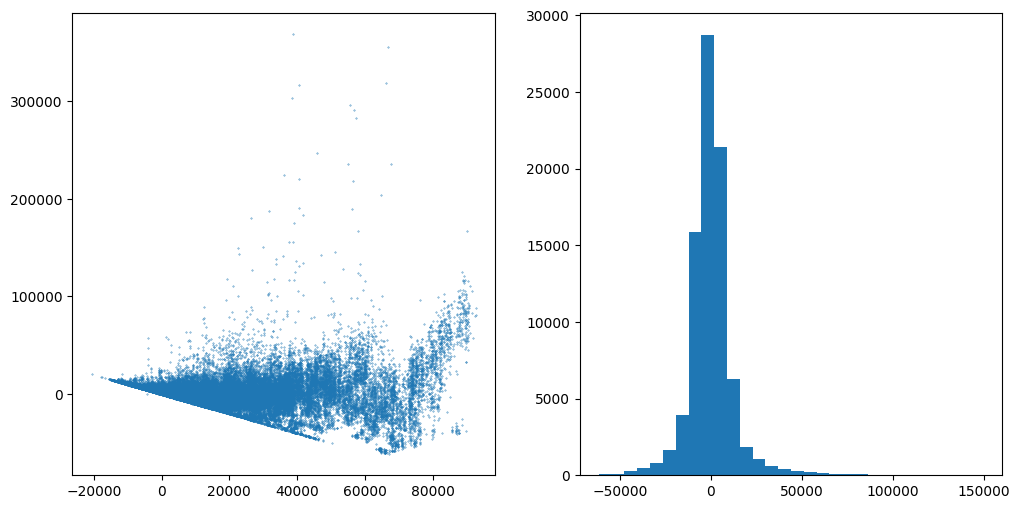

,model,rmse,r2
0,linear-1,22485.902129,0.030405
1,linear-2,22485.902129,0.030405
2,linear-2,13367.780926,0.657320


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
evaluate_model("linear-2",y_test,y_pred)

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model = ridge_model.fit(X_train,y_train)


In [ ]:
from sklearn.model_selection import GridSearchCV
ridge_grid = Ridge()
param_grid = {
    "alpha":[0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(ridge_grid,param_grid)
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)



In [ ]:
grid_search.best_params_

{'alpha': 0.1}

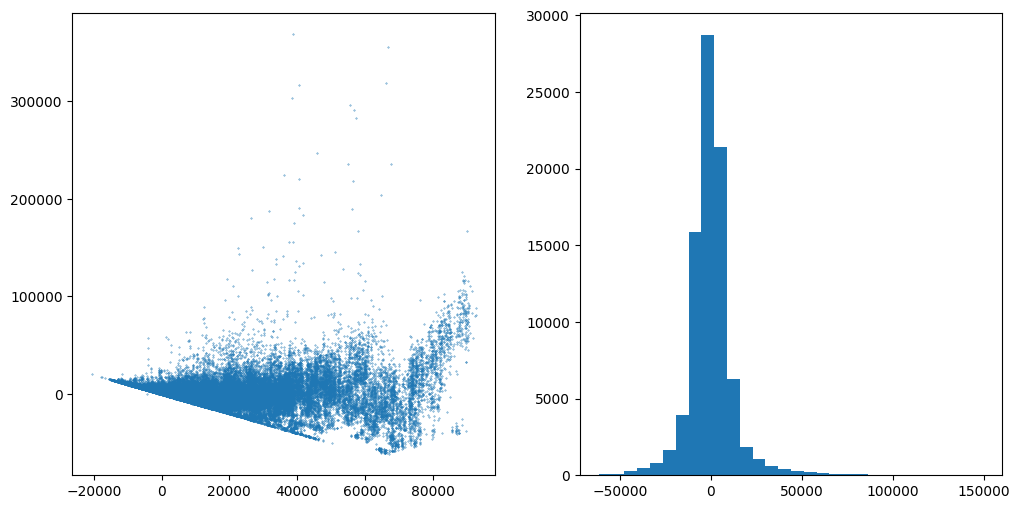

,model,rmse,r2
0,linear-1,22485.902129,0.030405
1,linear-2,22485.902129,0.030405
2,linear-2,13367.780926,0.657320
3,ridge-1,13367.776469,0.657320
4,ridge-grid-1,13367.776469,0.657320
5,ridge-grid-1,13367.776469,0.657320


In [ ]:
evaluate_model("ridge-grid-1",y_test,y_pred)

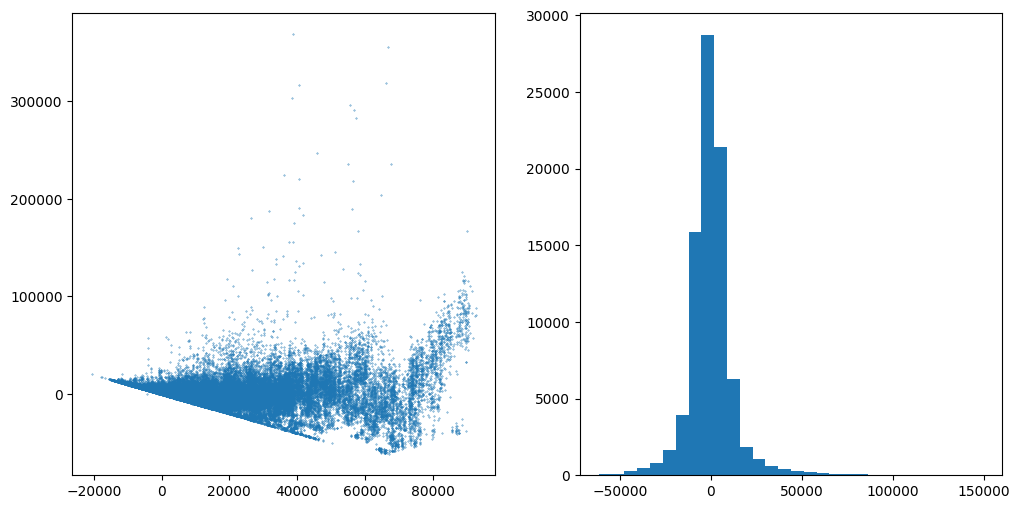

,model,rmse,r2
0,linear-1,22485.902129,0.030405
1,linear-2,22485.902129,0.030405
2,linear-2,13367.780926,0.657320
3,ridge-1,13367.776469,0.657320


In [ ]:
y_pred = ridge_model.predict(X_test)
evaluate_model("ridge-1",y_test,y_pred)

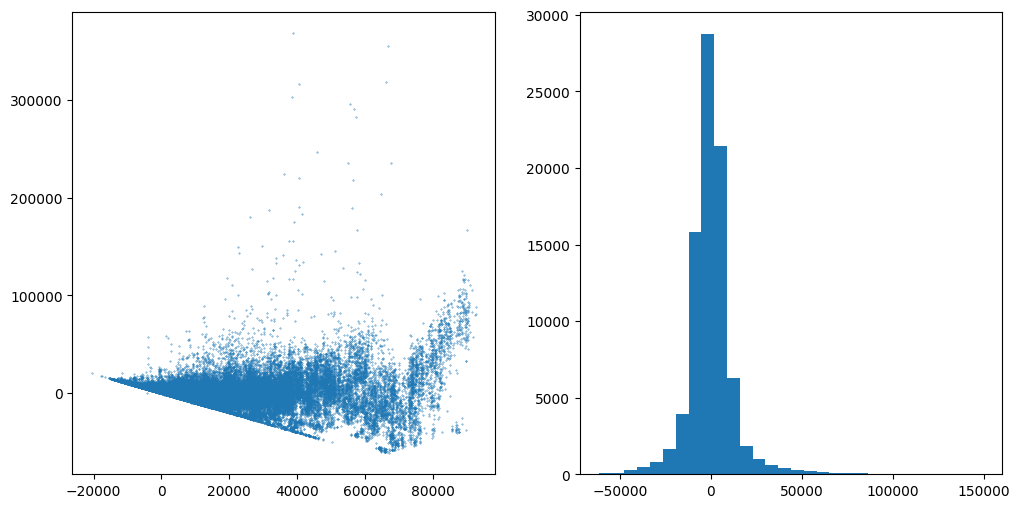

,model,rmse,r2
0,linear-1,22485.902129,0.030405
1,linear-2,22485.902129,0.030405
2,linear-2,13367.780926,0.657320
3,ridge-1,13367.776469,0.657320
4,ridge-grid-1,13367.776469,0.657320
5,ridge-grid-1,13367.776469,0.657320
6,lasso-1,13367.769160,0.657321


In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model = lasso_model.fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)
evaluate_model("lasso-1",y_test,y_pred)

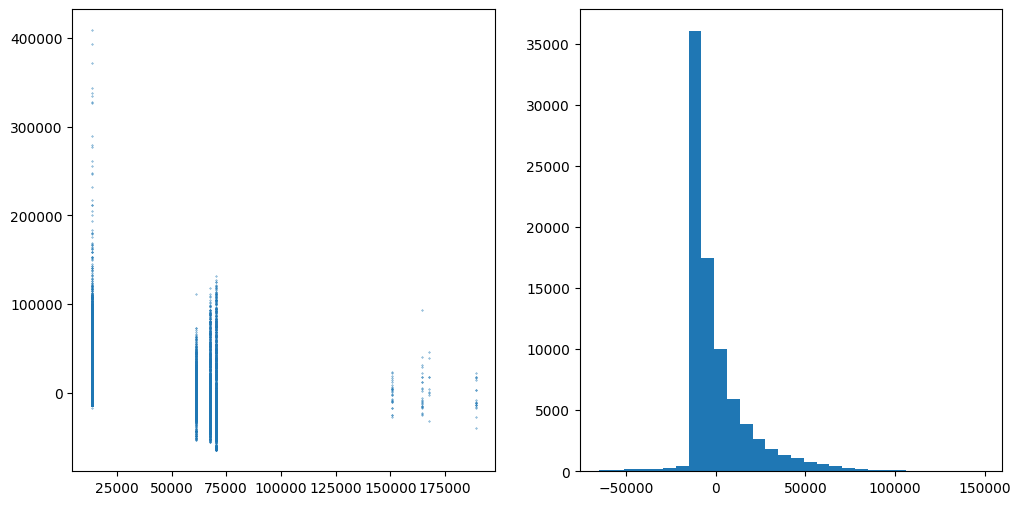

,model,rmse,r2
0,linear-1,22485.902129,0.030405
1,linear-2,22485.902129,0.030405
2,linear-2,13367.780926,0.657320
3,ridge-1,13367.776469,0.657320
4,ridge-grid-1,13367.776469,0.657320
5,ridge-grid-1,13367.776469,0.657320
6,lasso-1,13367.769160,0.657321
7,tree-1,19320.317365,0.284189


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree_reg = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_reg.fit(X_train,y_train)
y_pred = tree_reg.predict(X_test)
evaluate_model("tree-1",y_test,y_pred)

[Text(0.5, 0.875, 'Dept_92 <= 0.5\nsquared_error = 514378022.705\nsamples = 337256\nvalue = 15979.222'),
 Text(0.25, 0.625, 'Dept_95 <= 0.5\nsquared_error = 431000943.447\nsamples = 332159\nvalue = 15075.103'),
 Text(0.125, 0.375, 'Dept_38 <= 0.5\nsquared_error = 367299062.513\nsamples = 326980\nvalue = 14214.073'),
 Text(0.0625, 0.125, 'squared_error = 327769016.606\nsamples = 321807\nvalue = 13458.564'),
 Text(0.1875, 0.125, 'squared_error = 581968262.886\nsamples = 5173\nvalue = 61213.496'),
 Text(0.375, 0.375, 'Store_20 <= 0.5\nsquared_error = 1450858027.504\nsamples = 5179\nvalue = 69436.866'),
 Text(0.3125, 0.125, 'squared_error = 1327074835.149\nsamples = 5065\nvalue = 67604.033'),
 Text(0.4375, 0.125, 'squared_error = 170027787.035\nsamples = 114\nvalue = 150869.314'),
 Text(0.75, 0.625, 'Store_14 <= 0.5\nsquared_error = 2423113683.491\nsamples = 5097\nvalue = 74898.44'),
 Text(0.625, 0.375, 'Store_2 <= 0.5\nsquared_error = 2189053276.075\nsamples = 4982\nvalue = 72409.341'),
 

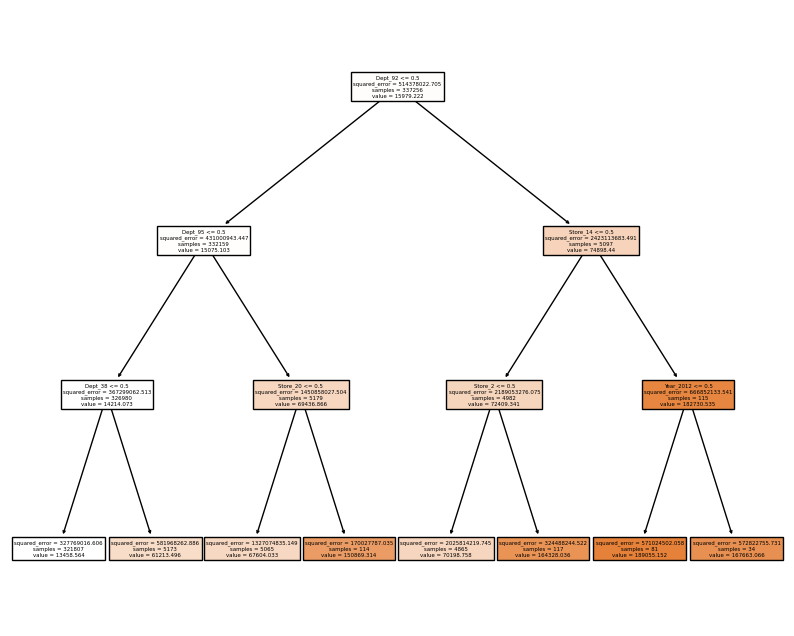

In [ ]:
plt.figure(figsize=(10,8))
plot_tree(tree_reg,feature_names=X.columns,filled=True)

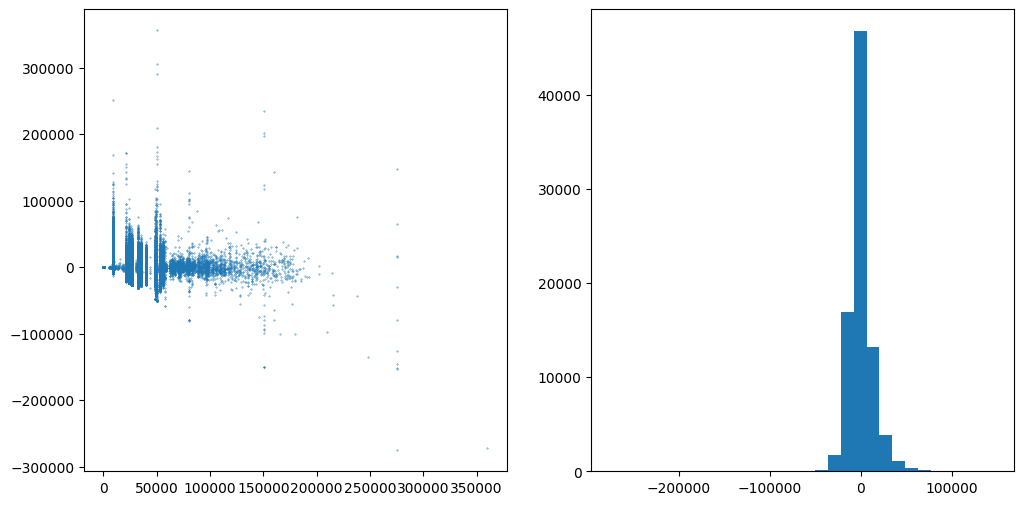

,model,rmse,r2
0,linear-1,22485.902129,0.030405
1,linear-2,22485.902129,0.030405
2,linear-2,13367.780926,0.657320
3,ridge-1,13367.776469,0.657320
4,ridge-grid-1,13367.776469,0.657320
5,ridge-grid-1,13367.776469,0.657320
6,lasso-1,13367.769160,0.657321
7,tree-1,19320.317365,0.284189
8,tree-2,13237.717775,0.663956


In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=15,random_state=42)
tree_reg.fit(X_train,y_train)
y_pred = tree_reg.predict(X_test)
evaluate_model("tree-2",y_test,y_pred)

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
param_grid = {
    "max_depth":list(range(10,17))
}
grid_search = GridSearchCV(tree_reg,param_grid)

grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)
evaluate_model("tree-2",y_test,y_pred)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


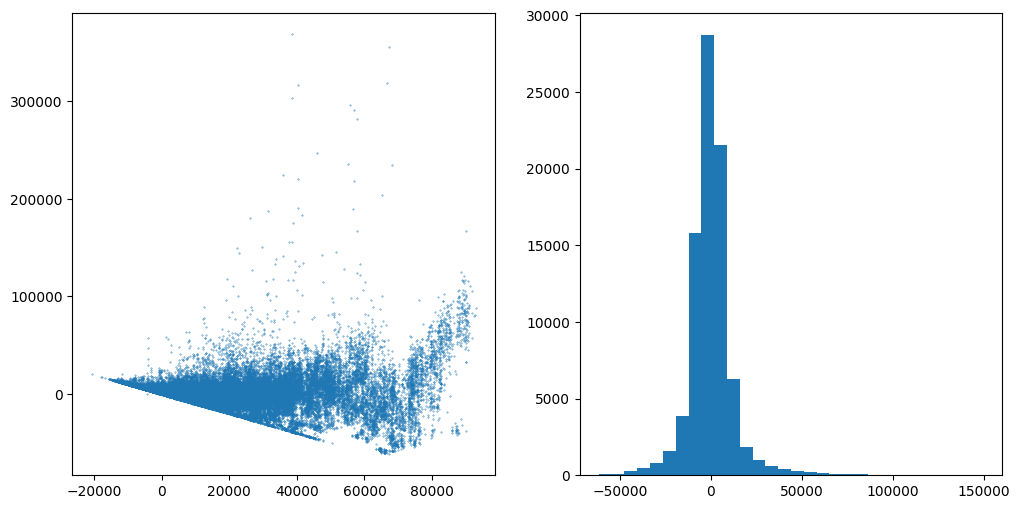

,model,rmse,r2
0,linear-1,22485.902129,0.030405
1,linear-2,22485.902129,0.030405
2,linear-2,13367.780926,0.657320
3,ridge-1,13367.776469,0.657320
4,ridge-grid-1,13367.776469,0.657320
5,ridge-grid-1,13367.776469,0.657320
6,lasso-1,13367.769160,0.657321
7,tree-1,19320.317365,0.284189
8,tree-2,13237.717775,0.663956
9,bagging-1,13368.181770,0.657300


In [ ]:
from sklearn.ensemble import BaggingRegressor

linmod = LinearRegression()

bag_reg = BaggingRegressor(base_estimator=linmod, n_estimators=10, random_state=42)
bag_reg.fit(X_train,y_train)
y_pred = bag_reg.predict(X_test)
evaluate_model("bagging-1",y_test,y_pred)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_mod = RandomForestRegressor(n_estimators=10,max_depth=15,random_state=42)
rf_mod.fit(X_train,y_train)


NameError: ignored

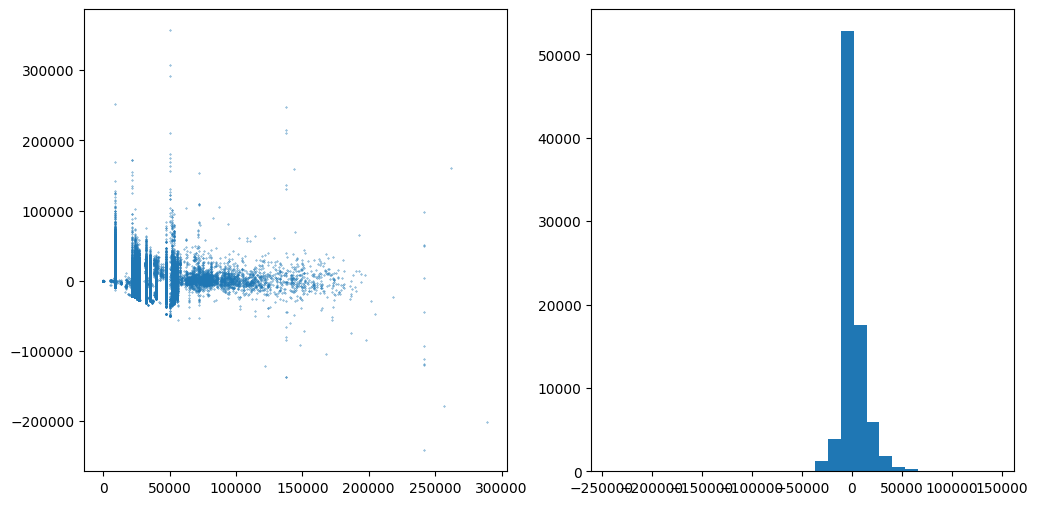

,model,rmse,r2
0,linear-1,22485.902129,0.030405
1,linear-2,22485.902129,0.030405
2,linear-2,13367.780926,0.657320
3,ridge-1,13367.776469,0.657320
4,ridge-grid-1,13367.776469,0.657320
5,ridge-grid-1,13367.776469,0.657320
6,lasso-1,13367.769160,0.657321
7,tree-1,19320.317365,0.284189
8,tree-2,13237.717775,0.663956
9,bagging-1,13368.181770,0.657300


In [ ]:
y_pred = rf_mod.predict(X_test)
evaluate_model("random-forest-1",y_test,y_pred)

In [ ]:
pip install mysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysqlclient: filename=mysqlclient-2.1.1-cp39-cp39-linux_x86_64.whl size=107571 sha256=bd93a9a9924f48dc922d03285cf284c3c1dda497ad959a919bf7aadaeebf9d07
  Stored in directory: /root/.cache/pip/wheels/f3/a5/27/c6312d8008951cfd5511684378a9e057b82006c70e1fea6107
Successfully built mysqlclient


In [ ]:
pip install mysql-connector-python-rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 67.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp39-cp39-linux_x86_64.whl size=249472 sha256=78fc23c1b03a4dd2d9f9fc53146f3db02120fbb7084465ab700a17fd3067e345
  Stored in directory: /root/.cache/pip/wheels/64/06/5b/ef9543936a3f5de15b02775b6ae548a09f3ed2319d20342771
Successfully built mysql-connector-python-rf


In [ ]:
pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 43.0 MB/s eta 0:00:00


In [ ]:
class Credentials:

  def __init__(self):
    self.user = "bootcamp_student"
    self.password = "goodRobot1"
    self.host = "107.180.55.15"
    self.port = 3306
    self.database = "data_bootcamp"
    
class Connection:

  def __init__(self,host,user,password,database):
    self.host = host
    self.user = user
    self.password = password
    self.database = database

  def connection(self):
    from mysql.connector import connect

    return connect(
        host = self.host,
        user = self.user,
        password = self.password,
        database = self.database
    )

class Read:

  def __init__(self,query_string,credentials):
    self.query_string = query_string
    self.credentials = credentials

  def get_data(self):

    con = Connection(
        host = self.credentials.host,
        user = self.credentials.user,
        password = self.credentials.password,
        database = self.credentials.database,
    )

    raw_result = []

    with con.connection() as connection:
      with connection.cursor() as cursor:
        cursor.execute(self.query_string)

        raw_result.append([i[0] for i in cursor.description])

        result = cursor.fetchall()
        for row in result:
          raw_result.append(row)

    good_result = {}
    for i in range(len(raw_result[0])):
      header_name = raw_result[0][i]
      data_col = list(map(lambda x: x[i], raw_result[1:]))
      good_result[header_name] = data_col
    good_result = pd.DataFrame(good_result)

    return good_result

In [ ]:
query_string = "select * from housing;"
housing = Read(query_string,Credentials()).get_data()
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.5,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,20150223T000000,400000,4,2.5,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,20150116T000000,400000,3,2.5,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287


In [ ]:
housing.index = pd.to_datetime(housing["date"])
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,,
2014-10-13,7129300520,20141013T000000,221900,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
2014-12-09,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2015-02-25,5631500400,20150225T000000,180000,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
2014-12-09,2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
2015-02-18,1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,263000018,20140521T000000,360000,3,2.5,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
2015-02-23,6600060120,20150223T000000,400000,4,2.5,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
2014-06-23,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21613 entries, 2014-10-13 to 2014-10-15
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21613 non-null  object
 1   date           21613 non-null  object
 2   price          21613 non-null  int64 
 3   bedrooms       21613 non-null  object
 4   bathrooms      21613 non-null  object
 5   sqft_living    21613 non-null  int64 
 6   sqft_lot       21613 non-null  int64 
 7   floors         21613 non-null  object
 8   waterfront     21613 non-null  int64 
 9   view           21613 non-null  int64 
 10  condition      21613 non-null  int64 
 11  grade          21613 non-null  int64 
 12  sqft_above     21613 non-null  int64 
 13  sqft_basement  21613 non-null  int64 
 14  yr_built       21613 non-null  int64 
 15  yr_renovated   21613 non-null  int64 
 16  zipcode        21613 non-null  object
 17  lat            21613 non-null  object
 18  long     

In [ ]:
to_drop = ["date","zipcode","lat","long","id"]
to_num = ["bedrooms","bathrooms","floors"]

housing.drop(to_drop,axis=1,inplace=True)
for col in to_num:
  housing[col] = housing[col].astype(float)

housing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21613 entries, 2014-10-13 to 2014-10-15
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  float64
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.8 MB


In [ ]:
housing["yr_renovated"] = (housing["yr_renovated"] > 0) * 1
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,
2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639
2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
2015-02-23,400000,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
2014-06-23,402101,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007


In [ ]:
housing["has_basement"] = (housing["sqft_basement"] > 0) * 1
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,has_basement
date,,,,,,,,,,,,,,,,,
2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639,1
2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1
2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0
2015-02-23,400000,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0
2014-06-23,402101,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0


In [ ]:
housing = housing[housing["bedrooms"] <= 4]
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,has_basement
date,,,,,,,,,,,,,,,,,
2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639,1
2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1
2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0
2015-02-23,400000,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0
2014-06-23,402101,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = housing.drop("bedrooms", axis=1)
y = housing["bedrooms"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


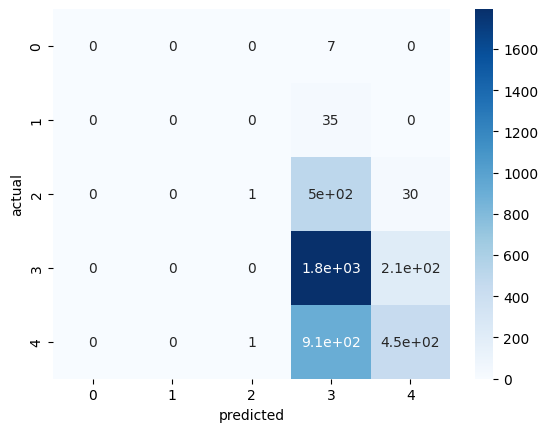

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167
1,logistic-1,0.569360,0.572944,0.569360


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

evaluate_classifier("logistic-1",y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

0.569359756097561

Text(50.722222222222214, 0.5, 'actual')

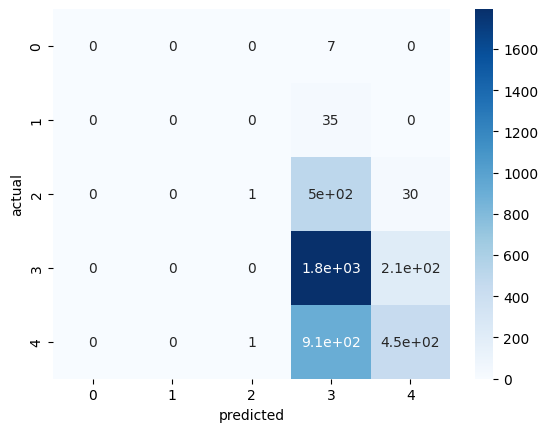

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,annot=True,cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_class = DecisionTreeClassifier()
dt_class.fit(X_train,y_train)
y_pred = dt_class.predict(X_test)

accuracy_score(y_test,y_pred)

0.6041666666666666

In [ ]:
from sklearn.metrics import precision_score, recall_score

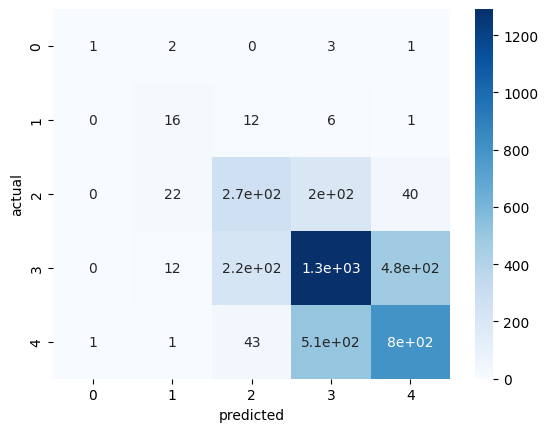

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167


In [ ]:
class_tracker = pd.DataFrame({"model":[],"accuracy":[],"precision":[],"recall":[]})

def evaluate_classifier(model_name,y_test,y_pred):

  acc = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred,average="weighted")
  recall = recall_score(y_test,y_pred,average="weighted")

  payload = [model_name,acc,precision,recall]
  class_tracker.loc[len(class_tracker.index)] = payload

  conf_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_mat,annot=True,cmap="Blues")
  plt.xlabel("predicted")
  plt.ylabel("actual")
  plt.show()

  return class_tracker

evaluate_classifier("decision-tree-1",y_test,y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


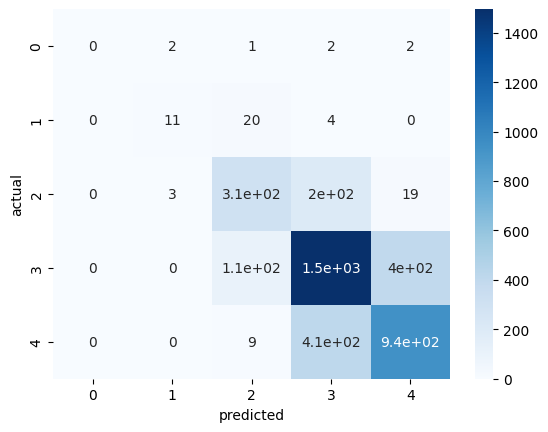

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167
1,logistic-1,0.569360,0.572944,0.569360
2,random-forest-1,0.696900,0.695053,0.696900
3,svm-1,0.558943,0.491530,0.558943
4,random-forest-2,0.698679,0.697036,0.698679


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train,y_train)
y_pred = rf_class.predict(X_test)
evaluate_classifier("random-forest-2",y_test,y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


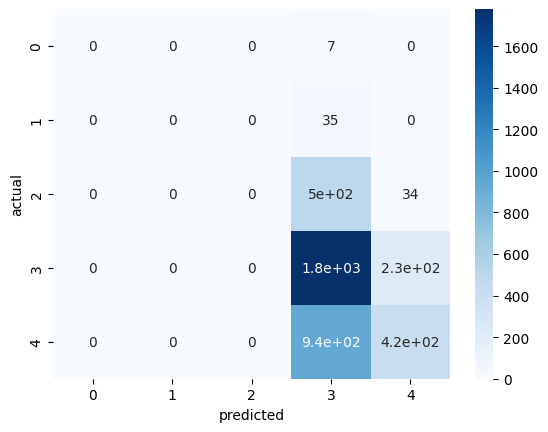

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167
1,logistic-1,0.569360,0.572944,0.569360
2,random-forest-1,0.696900,0.695053,0.696900
3,svm-1,0.558943,0.491530,0.558943


In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
evaluate_classifier("svm-1",y_test,y_pred)

In [ ]:
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,has_basement
date,,,,,,,,,,,,,,,,,
2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639,1
2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1
2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0
2015-02-23,400000,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0
2014-06-23,402101,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0


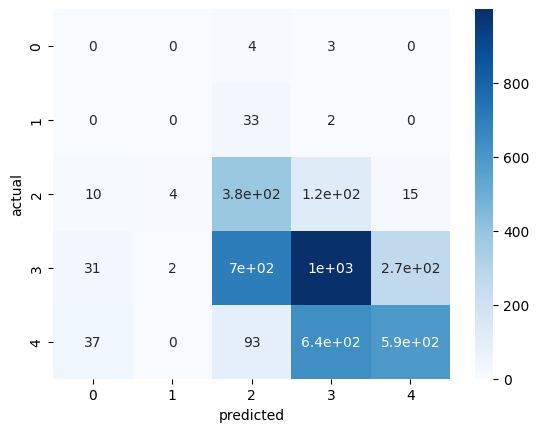

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167
1,logistic-1,0.569360,0.572944,0.569360
2,random-forest-1,0.696900,0.695053,0.696900
3,svm-1,0.558943,0.491530,0.558943
4,random-forest-2,0.698679,0.697036,0.698679
5,naive-bayes-1,0.502033,0.565124,0.502033


In [ ]:
from sklearn.naive_bayes import GaussianNB

bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train,y_train)
y_pred = bayes_classifier.predict(X_test)
evaluate_classifier("naive-bayes-1",y_test,y_pred)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


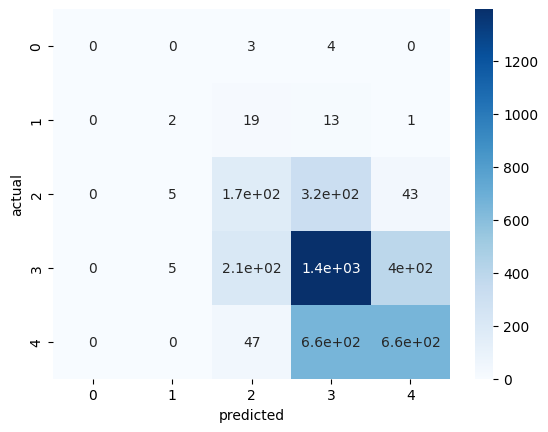

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167
1,logistic-1,0.569360,0.572944,0.569360
2,random-forest-1,0.696900,0.695053,0.696900
3,svm-1,0.558943,0.491530,0.558943
4,random-forest-2,0.698679,0.697036,0.698679
5,naive-bayes-1,0.502033,0.565124,0.502033
6,knn-1,0.564533,0.557354,0.564533


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
evaluate_classifier("knn-1",y_test,y_pred)



In [ ]:
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,has_basement
date,,,,,,,,,,,,,,,,,
2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639,1
2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1
2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0
2015-02-23,400000,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0
2014-06-23,402101,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0


In [ ]:
housing["sqft_living_sq"] = housing["sqft_living"] ** 2
housing["sqft_lot_sq"] = housing["sqft_lot"] ** 2

X = housing.drop("bedrooms",axis=1)
y = housing["bedrooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-122-b5e8c1491bf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["sqft_living_sq"] = housing["sqft_living"] ** 2
<ipython-input-122-b5e8c1491bf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["sqft_lot_sq"] = housing["sqft_lot"] ** 2


In [ ]:
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,has_basement,sqft_living_sq,sqft_lot_sq
date,,,,,,,,,,,,,,,,,,,
2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,1392400,31922500
2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639,1,6604900,52446564
2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,592900,100000000
2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1,3841600,25000000
2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,2822400,65286400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0,2340900,1279161
2015-02-23,400000,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0,5336100,33790969
2014-06-23,402101,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0,1040400,1822500


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


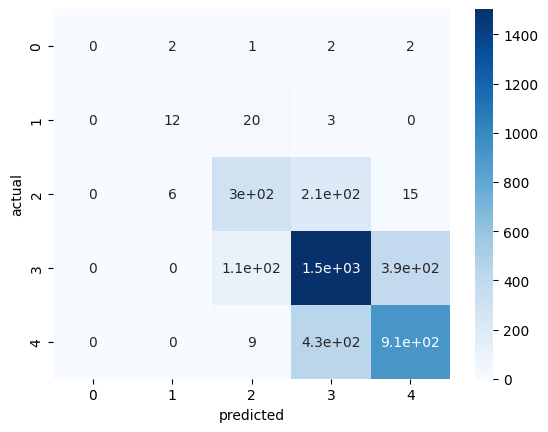

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167
1,logistic-1,0.569360,0.572944,0.569360
2,random-forest-1,0.696900,0.695053,0.696900
3,svm-1,0.558943,0.491530,0.558943
4,random-forest-2,0.698679,0.697036,0.698679
5,naive-bayes-1,0.502033,0.565124,0.502033
6,knn-1,0.564533,0.557354,0.564533
7,random-forest-3,0.694360,0.692436,0.694360


In [ ]:
rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train,y_train)
y_pred = rf_class.predict(X_test)
evaluate_classifier("random-forest-3",y_test,y_pred)

In [ ]:
housing.drop(["sqft_living_sq","sqft_lot_sq"],axis=1,inplace=True)


<ipython-input-126-a08381ada028>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.drop(["sqft_living_sq","sqft_lot_sq"],axis=1,inplace=True)


In [ ]:
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,has_basement
date,,,,,,,,,,,,,,,,,
2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0
2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639,1
2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0
2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1
2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0
2015-02-23,400000,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0
2014-06-23,402101,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0


<ipython-input-129-22d54da8cb6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["sqft_non_living"] = housing["sqft_lot"] - housing["sqft_living"]
<ipython-input-129-22d54da8cb6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["has_quarter_bath"] = (housing["bathrooms"] % 1 == 0.25) * 1
<ipython-input-129-22d54da8cb6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

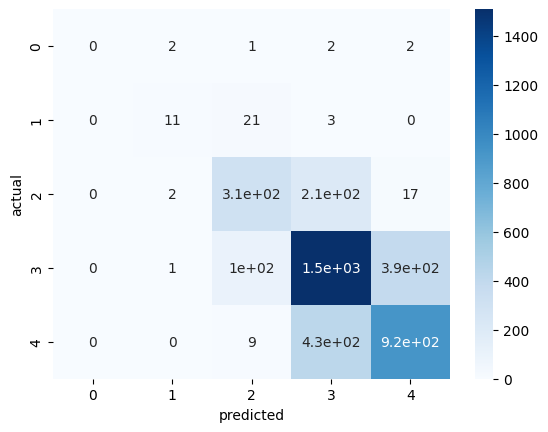

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167
1,logistic-1,0.569360,0.572944,0.569360
2,random-forest-1,0.696900,0.695053,0.696900
3,svm-1,0.558943,0.491530,0.558943
4,random-forest-2,0.698679,0.697036,0.698679
5,naive-bayes-1,0.502033,0.565124,0.502033
6,knn-1,0.564533,0.557354,0.564533
7,random-forest-3,0.694360,0.692436,0.694360
8,random-forest-4,0.698425,0.696814,0.698425


In [ ]:
housing["sqft_non_living"] = housing["sqft_lot"] - housing["sqft_living"]
housing["has_quarter_bath"] = (housing["bathrooms"] % 1 == 0.25) * 1
housing["has_half_bath"] = (housing["bathrooms"] % 1 == 0.5) * 1
housing["has_3q_bath"] = (housing["bathrooms"] % 1 == 0.75) * 1

X = housing.drop("bedrooms",axis=1)
y = housing["bedrooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train,y_train)
y_pred = rf_class.predict(X_test)
evaluate_classifier("random-forest-4",y_test,y_pred)

In [ ]:
to_drop = ["sqft_non_living","has_quarter_bath","has_half_bath","has_3q_bath"]
housing.drop(to_drop,axis=1,inplace=True)

<ipython-input-130-67beb9a27a46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.drop(to_drop,axis=1,inplace=True)


In [ ]:
housing["sqft_per_floor"] = housing["sqft_living"] / housing["floors"]
housing

<ipython-input-132-1c02fe1290fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["sqft_per_floor"] = housing["sqft_living"] / housing["floors"]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,has_basement,sqft_per_floor
date,,,,,,,,,,,,,,,,,,
2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,1180.0
2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639,1,1285.0
2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,770.0
2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1,1960.0
2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,1680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0,510.0
2015-02-23,400000,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0,1155.0
2014-06-23,402101,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0,510.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


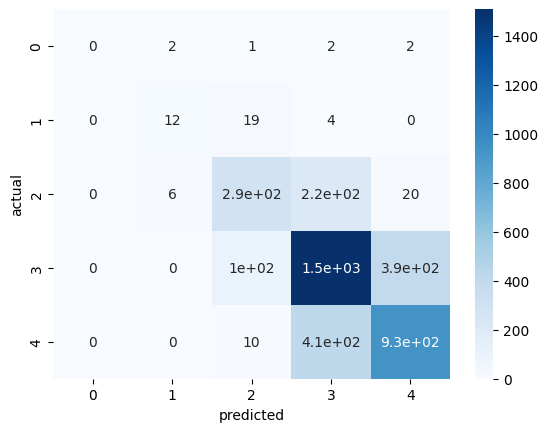

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167
1,logistic-1,0.569360,0.572944,0.569360
2,random-forest-1,0.696900,0.695053,0.696900
3,svm-1,0.558943,0.491530,0.558943
4,random-forest-2,0.698679,0.697036,0.698679
5,naive-bayes-1,0.502033,0.565124,0.502033
6,knn-1,0.564533,0.557354,0.564533
7,random-forest-3,0.694360,0.692436,0.694360
8,random-forest-4,0.698425,0.696814,0.698425
9,random-forest-5,0.697663,0.695592,0.697663


In [ ]:

X = housing.drop("bedrooms",axis=1)
y = housing["bedrooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train,y_train)
y_pred = rf_class.predict(X_test)
evaluate_classifier("random-forest-5",y_test,y_pred)

In [ ]:
housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'has_basement', 'sqft_per_floor'],
      dtype='object')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


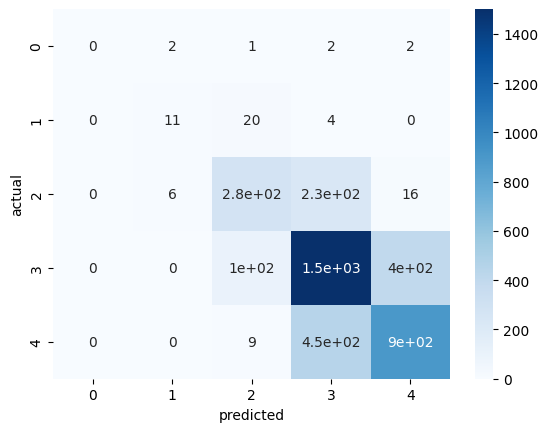

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167
1,logistic-1,0.569360,0.572944,0.569360
2,random-forest-1,0.696900,0.695053,0.696900
3,svm-1,0.558943,0.491530,0.558943
4,random-forest-2,0.698679,0.697036,0.698679
5,naive-bayes-1,0.502033,0.565124,0.502033
6,knn-1,0.564533,0.557354,0.564533
7,random-forest-3,0.694360,0.692436,0.694360
8,random-forest-4,0.698425,0.696814,0.698425
9,random-forest-5,0.697663,0.695592,0.697663


In [ ]:

X = housing.drop(["bedrooms","yr_built"],axis=1)
y = housing["bedrooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train,y_train)
y_pred = rf_class.predict(X_test)
evaluate_classifier("random-forest-6",y_test,y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


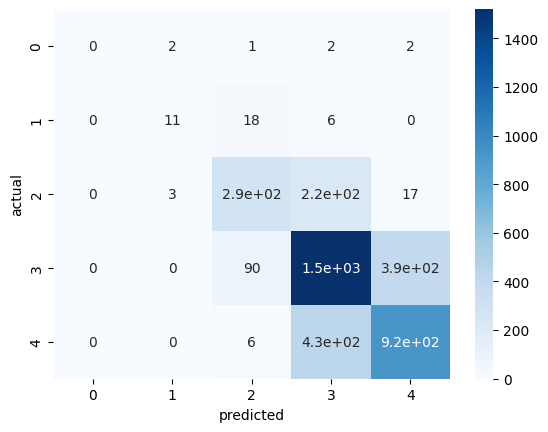

,model,accuracy,precision,recall
0,decision-tree-1,0.604167,0.605855,0.604167
1,logistic-1,0.569360,0.572944,0.569360
2,random-forest-1,0.696900,0.695053,0.696900
3,svm-1,0.558943,0.491530,0.558943
4,random-forest-2,0.698679,0.697036,0.698679
5,naive-bayes-1,0.502033,0.565124,0.502033
6,knn-1,0.564533,0.557354,0.564533
7,random-forest-3,0.694360,0.692436,0.694360
8,random-forest-4,0.698425,0.696814,0.698425
9,random-forest-5,0.697663,0.695592,0.697663


In [ ]:
year_dummies = pd.get_dummies(housing["yr_built"],drop_first=True,prefix="yr_built")

X = pd.concat([housing.drop(["bedrooms","yr_built"],axis=1),year_dummies],axis=1)
y = housing["bedrooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train,y_train)
y_pred = rf_class.predict(X_test)
evaluate_classifier("random-forest-7",y_test,y_pred)


In [ ]:
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,has_basement,sqft_per_floor
date,,,,,,,,,,,,,,,,,,
2014-10-13,221900,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,0,1180.0
2014-12-09,538000,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1690,7639,1,1285.0
2015-02-25,180000,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,770.0
2014-12-09,604000,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1,1960.0
2015-02-18,510000,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,1680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,0,510.0
2015-02-23,400000,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,0,1155.0
2014-06-23,402101,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,0,510.0
